In [1]:
from simulation import Simulation
import matplotlib
import matplotlib.pyplot as plt
from collections import OrderedDict
matplotlib.rcParams['figure.figsize'] = 5, 10
%matplotlib inline

/Users/lukaszczaplinski/Documents/Coviz/simulation.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
pop_factor = 0.0001
def sim(soc_factor):
    return Simulation(
        simulation_length=90,
        # https://en.wikipedia.org/wiki/Poland#cite_ref-12
        people_no=int(38_000_000*pop_factor),
        infected_at_beginning=5,
        sociability_mean=int(10.0*soc_factor),
        sociability_dev=int(5.0*soc_factor),
        infection_time_mean=10,
        infection_time_dev=2,
        infection_probability=0.1,
        # Data as of 2016, https://apps.who.int/iris/bitstream/handle/10665/325143/18176127-eng.pdf?sequence=1
        hospital_capacity=int(212_374*pop_factor),
        recovery_chance_in_hospital=1.0 - 0.03,
        recovery_chance_outside_hospital=1.0 - 0.06,
    )

In [3]:
labels = OrderedDict(
    [['zarażeni', 'orange'],
     ['martwi', 'red'],
     ['wyleczeni', 'green'],
     ['niezarażeni', 'blue']]
)  

In [53]:
def pick_state(sim1, state):
    return list(map(lambda st: int(st.count(state)/pop_factor), sim1.frames))

def plot_sim(sim1, title):
    p = lambda c: pick_state(sim1, c)
    infected_over_time = p('i')
    cured_over_time = p('c')
    healthy_over_time = p('h')
    dead_over_time = p('d')
    
    total_dead = max(dead_over_time)
    total_infected = max(cured_over_time)+total_dead
    
    total = int(sim1.people_no/pop_factor)
    hospital_capacity = int(sim1.hospital_capacity/pop_factor)

    Xs = list(range(len(sim1.frames)))
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.stackplot(Xs,
                  infected_over_time, 
                  dead_over_time, 
                  cured_over_time,
                  healthy_over_time,
                  labels=labels.keys(), colors=labels.values())
    plt.plot(Xs, [total_infected]*len(Xs), '--', color='orange', label=f"zarażeni ({total_infected})")
    plt.plot(Xs, [total_dead]*len(Xs), '--', color='red', label=f"martwi ({total_dead})")
    plt.plot(Xs, [hospital_capacity]*len(Xs), '--', color='black', label=f"miejsca szpitalne ({hospital_capacity})")
    plt.yticks(list(range(hospital_capacity, total, 10_000_000)) + [total_dead, total_infected, hospital_capacity])
    plt.legend(loc='upper left')

In [5]:
sim1 = sim(1.0)
sim1.simulate()

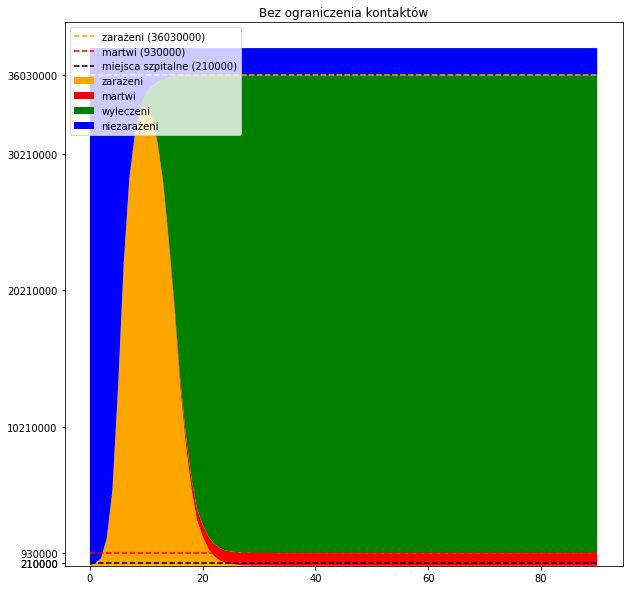

In [54]:
plot_sim(sim1, title="Bez ograniczenia kontaktów")

In [39]:
sim2 = sim(0.5)
sim2.simulate()

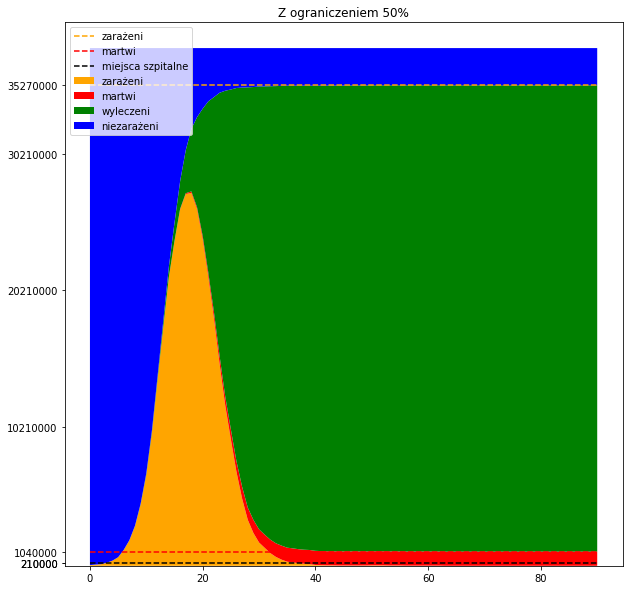

In [40]:
plot_sim(sim2, title="Z ograniczeniem 50%")

In [41]:
sim3 = sim(0.25)
sim3.simulate()

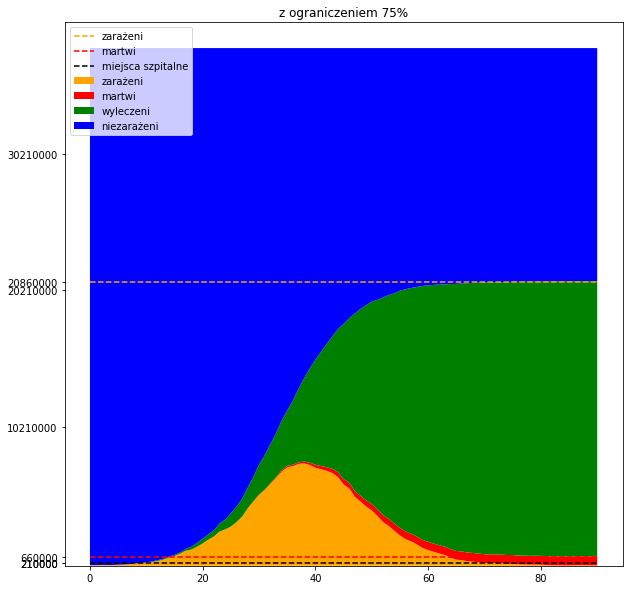

In [42]:
plot_sim(sim3, title="z ograniczeniem 75%")

In [49]:
sim4 = sim(0.2)
sim4.simulate()

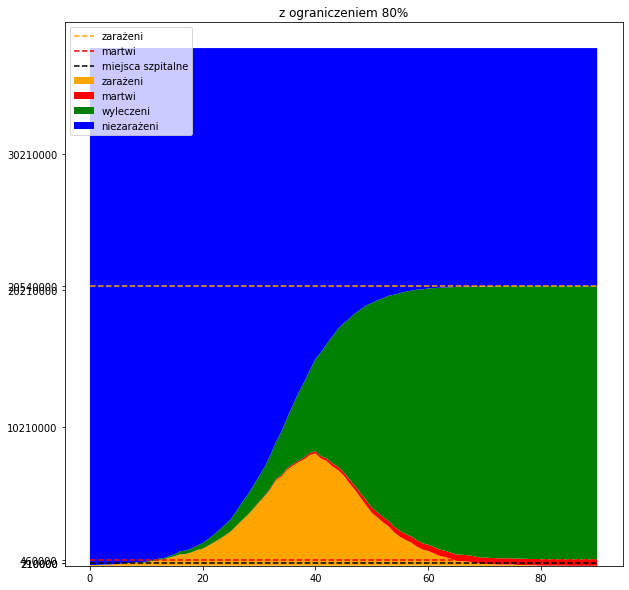

In [50]:
plot_sim(sim4, title="z ograniczeniem 80%")